In [23]:
import os

import pandas as pd
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [24]:
df = pd.read_csv("data/data.csv")
df

,idUsuario,artista,sexo,pais
0,5,dream theater,m,Finland
1,5,ac/dc,m,Finland
2,5,metallica,m,Finland
3,5,iron maiden,m,Finland
4,5,bob marley & the wailers,m,Finland
...,...,...,...,...
58450,19714,led zeppelin,m,United Kingdom
58451,19714,slipknot,m,United Kingdom
58452,19714,children of bodom,m,United Kingdom
58453,19714,vader,m,United Kingdom


In [25]:
transactions = df.groupby("idUsuario")["artista"].aggregate(list)
transactions

idUsuario
5        [dream theater, ac/dc, metallica, iron maiden,...
9        [arch enemy, strapping young lad, kreator, chi...
14       [sonic youth, the fall, mogwai, the velvet und...
22       [the jam, maxïmo park, supergrass, simon & gar...
24       [the byrds, leonard cohen, the beatles, simon ...
                               ...                        
19688    [bullet for my valentine, escape the fate, 30 ...
19701    [placebo, animal collective, crystal castles, ...
19703    [the offspring, pearl jam, the smashing pumpki...
19708    [coldplay, amy winehouse, armin van buuren, mo...
19714    [misfits, type o negative, arch enemy, red hot...
Name: artista, Length: 3000, dtype: object

In [26]:
encoder = TransactionEncoder()
df_t = pd.DataFrame(encoder.fit_transform(transactions), columns=encoder.columns_)
df_t

,...and you will know us by the trail of dead,2pac,3 doors down,30 seconds to mars,311,36 crazyfists,44,50 cent,65daysofstatic,[unknown],...,wilco,within temptation,wolfgang amadeus mozart,wu-tang clan,yann tiersen,yeah yeah yeahs,yellowcard,yo la tengo,zero 7,Édith piaf
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2997,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [82]:
min_support = 0.01
file_path = f"data/itemsets_{min_support}.csv"

if not os.path.isfile(file_path):
    itemsets = apriori(df_t, min_support=min_support, use_colnames=True)
    itemsets.to_csv(file_path, index=False)
else:
    itemsets = pd.read_csv(file_path, converters={"itemsets": eval})

itemsets["itemsets"]

0        (...and you will know us by the trail of dead)
1                                                (2pac)
2                                        (3 doors down)
3                                  (30 seconds to mars)
4                                                 (311)
                             ...                       
1811                (radiohead, sigur rós, the beatles)
1812                 (radiohead, the cure, the beatles)
1813    (radiohead, the beatles, the smashing pumpkins)
1814        (radiohead, the white stripes, the beatles)
1815       (radiohead, the cure, the smashing pumpkins)
Name: itemsets, Length: 1816, dtype: object

In [83]:
itemsets["itemsets"].apply(len).describe()

count    1816.000000
mean        1.673458
std         0.558116
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: itemsets, dtype: float64

In [84]:
rules = association_rules(itemsets, metric="confidence", min_threshold=0.0).sort_values(
    by="lift", ascending=True
)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1374,(radiohead),(linkin park),0.169667,0.095667,0.012333,0.072692,0.759842,-0.003898,0.975224
1375,(linkin park),(radiohead),0.095667,0.169667,0.012333,0.128920,0.759842,-0.003898,0.953223
1392,(the beatles),(linkin park),0.172000,0.095667,0.013000,0.075581,0.790049,-0.003455,0.978273
1393,(linkin park),(the beatles),0.095667,0.172000,0.013000,0.135889,0.790049,-0.003455,0.958210
589,(metallica),(coldplay),0.111000,0.160667,0.014667,0.132132,0.822399,-0.003167,0.967121
...,...,...,...,...,...,...,...,...,...
1985,(the pussycat dolls),(rihanna),0.017667,0.045333,0.010667,0.603774,13.318535,0.009866,2.409397
309,(beyoncé),(rihanna),0.024667,0.045333,0.015333,0.621622,13.712242,0.014215,2.523048
308,(rihanna),(beyoncé),0.045333,0.024667,0.015333,0.338235,13.712242,0.014215,1.473837
1201,(nas),(jay-z),0.026000,0.031000,0.012333,0.474359,15.301902,0.011527,1.843463


In [30]:
# TODO: análise estratificada; incluir nacionalidade nas transações;

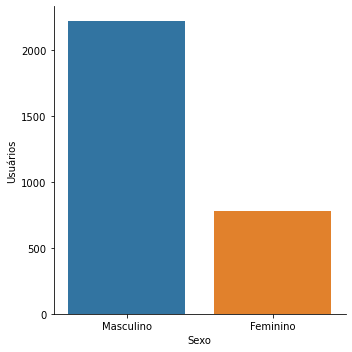

In [71]:
# Usuários
g = sns.catplot(data=df.groupby("idUsuario").first(), x="sexo", kind="count")
g.set_ylabels("Usuários")
g.set_xlabels("Sexo")
g.set_xticklabels(["Masculino", "Feminino"])

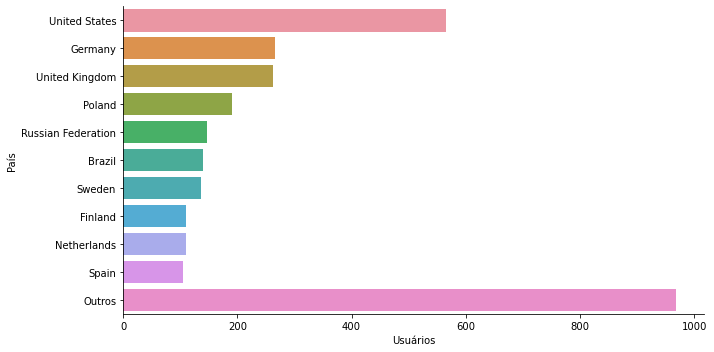

In [72]:
# Usuários
df_gp = df.groupby("idUsuario").first()

freq = list(df_gp["pais"].value_counts().index[:10])

df_in = df_gp[df_gp["pais"].isin(freq)]
df_out = df_gp[~df_gp["pais"].isin(freq)].copy()
df_out["pais"] = "Outros"

g = sns.catplot(
    data=pd.concat([df_in, df_out]),
    y="pais",
    kind="count",
    aspect=2,
    order=freq + ["Outros"],
    orient="h"
)
g.set_ylabels("País")
g.set_xlabels("Usuários")